In [68]:
from skimage.morphology import binary_dilation
from tqdm.auto import tqdm
from skimage.measure import regionprops_table
from skimage.transform import rotate
from skimage.measure import label
from joblib import Parallel, delayed
from skimage.segmentation import clear_border 
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def get_width_mask_image(mask, cell_data):
    size_masks = np.zeros_like(mask).astype(float)
    for width, mask_label in cell_data:
        bin_mask = (mask == mask_label)
        size_masks += (bin_mask*width)
    return size_masks
from matplotlib_scalebar.scalebar import ScaleBar

import matplotlib.patches as patches

In [4]:
masks_symbac = tifffile.imread("segmented/symbac_seg.tif")
masks_omnipose = tifffile.imread("segmented/bact_fluor_omni.tif")
FL_image = tifffile.imread("to_segment/FL-3.tif")

In [6]:
ommnipose_mask_width_data = pd.read_pickle("ommnipose_mask_width_data.pickle")
symbac_mask_width_data = pd.read_pickle("symbac_mask_width_data.pickle")

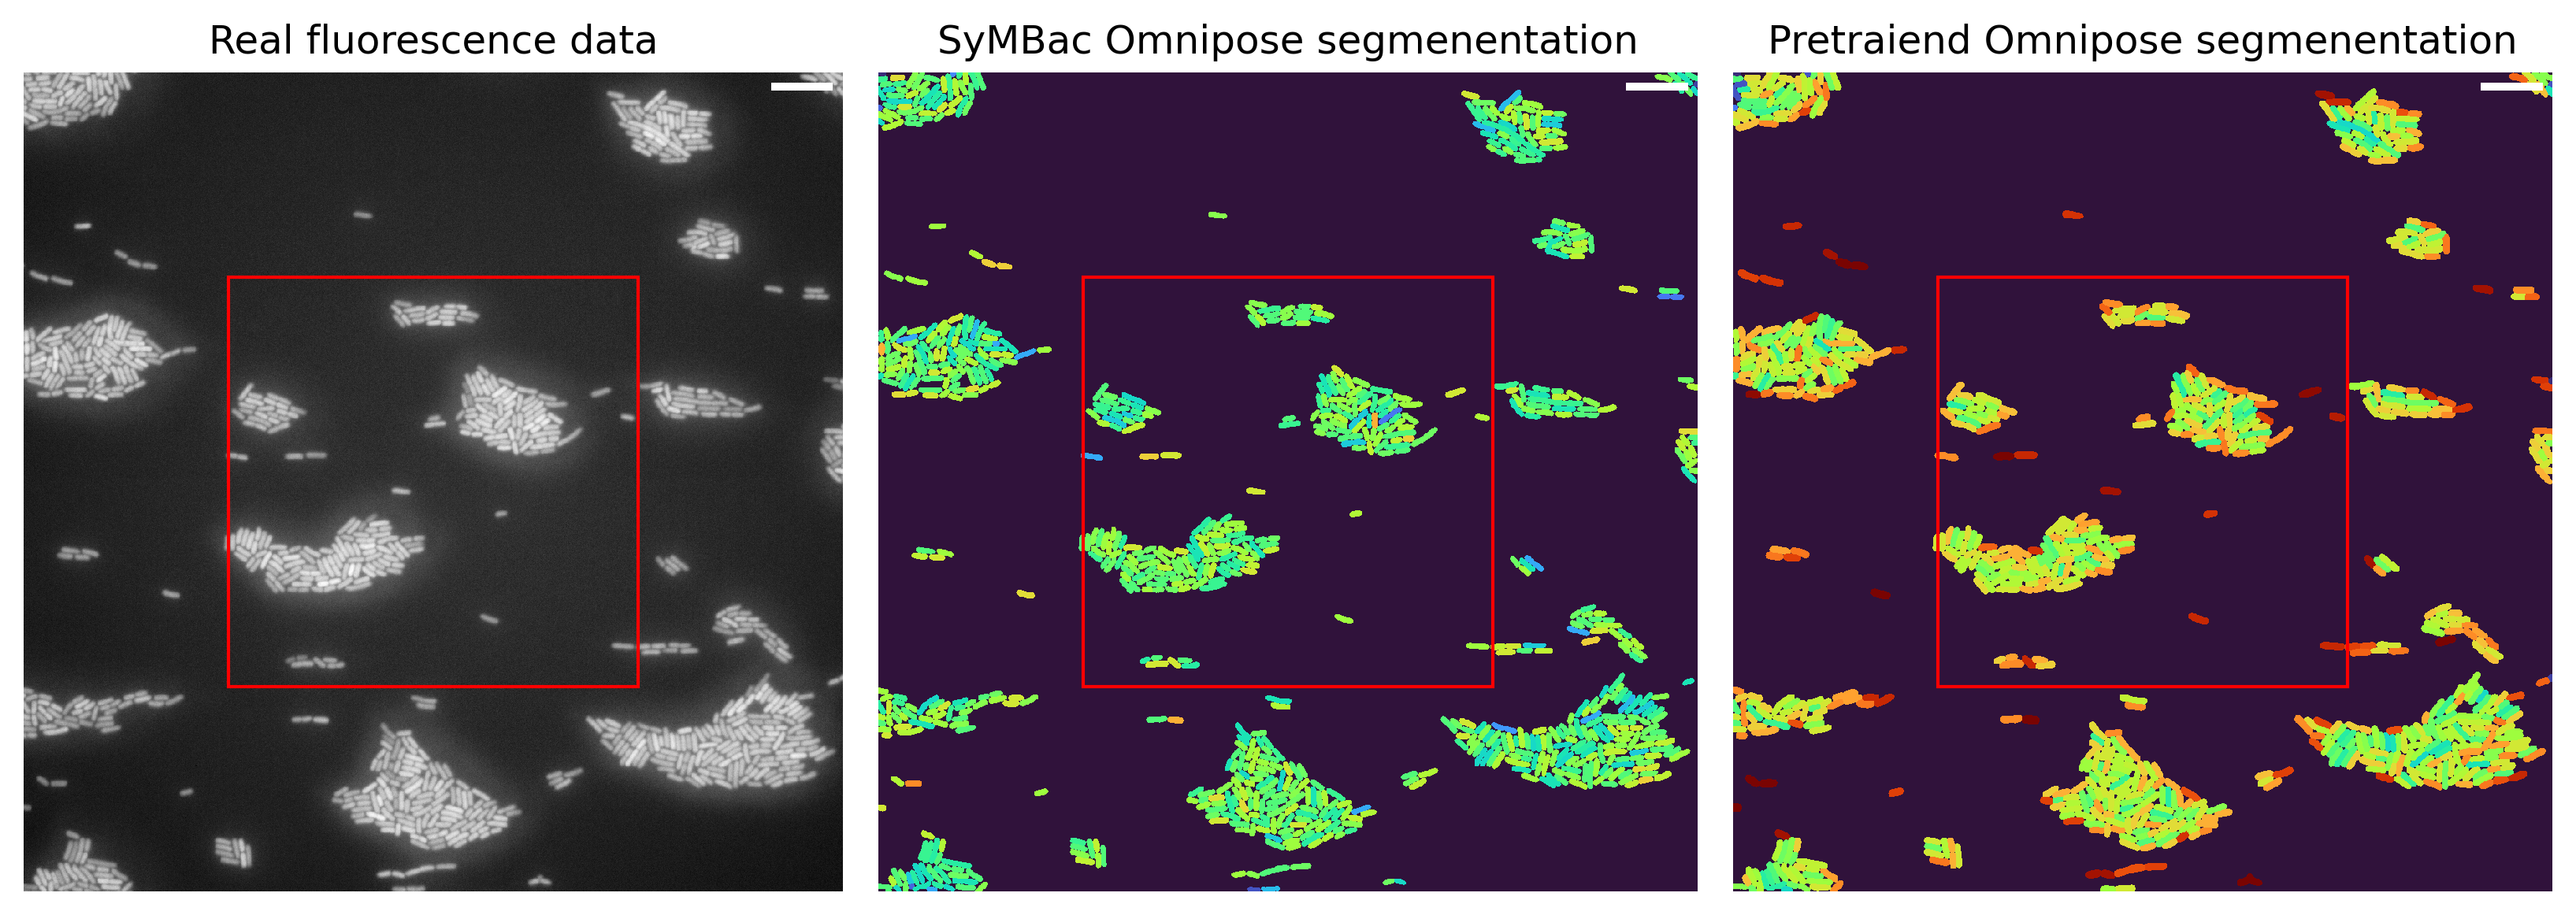

In [274]:
size_masks_omni = get_width_mask_image(masks_omnipose[0], np.array(ommnipose_mask_width_data.query("stack == 0")[["Width", "label"]]))
fig, axs = plt.subplots(1,3, figsize=(11,10), dpi = 300)
axs[0].imshow(FL_image[0], cmap="Greys_r", interpolation="none")
axs[1].imshow(size_masks_symbac * 0.11, vmin = 5.426 * 0.11, vmax = 11.66 * 0.11, cmap = "turbo", interpolation="none")
axs[2].imshow(size_masks_omni * 0.11, vmin = 5.426 * 0.11, vmax = 11.66 * 0.11, cmap = "turbo", interpolation="none")

axs[0].set_title("Real fluorescence data")
axs[1].set_title("SyMBac Omnipose segmenentation")
axs[2].set_title("Pretraiend Omnipose segmenentation")



for ax in axs:
    ax.set_axis_off()
    rect = patches.Rectangle((300, 300), 600, 600, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    scalebar = ScaleBar(0.11, "um", length_fraction=0.1,box_alpha=0,scale_loc="none", color="white", box_color="k") # 25 micon
    ax.add_artist(scalebar)

plt.tight_layout()
plt.savefig("SI_SEG_COMPARISON_1.svg")

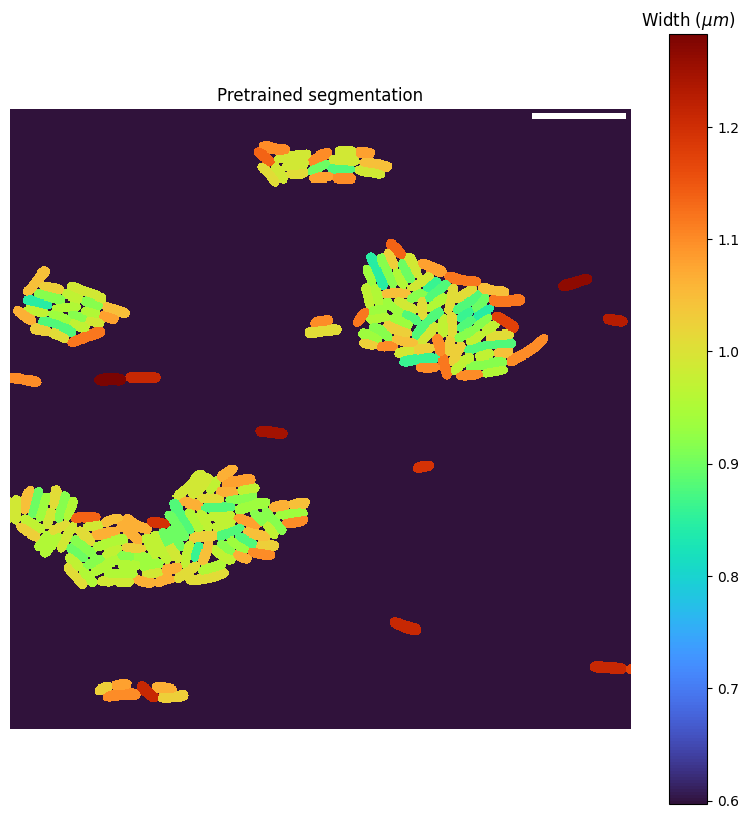

In [281]:
size_masks_omni = get_width_mask_image(masks_omnipose[0], np.array(ommnipose_mask_width_data.query("stack == 0")[["Width", "label"]]))
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(size_masks_omni[300:900,300:900] * 0.11, vmin = 5.426 * 0.11, vmax = 11.66 * 0.11, cmap = "turbo", interpolation="none")
clb = plt.colorbar()
clb.ax.set_title('Width ($\mu m$)')
plt.axis("off")
plt.title("Pretrained segmentation")
scalebar = ScaleBar(0.11, "um", length_fraction=0.2,box_alpha=0, scale_loc="none", color="white", box_color="k") # 25 micon
ax.add_artist(scalebar)
plt.savefig("SI_SEG_COMPARISON_2.svg")

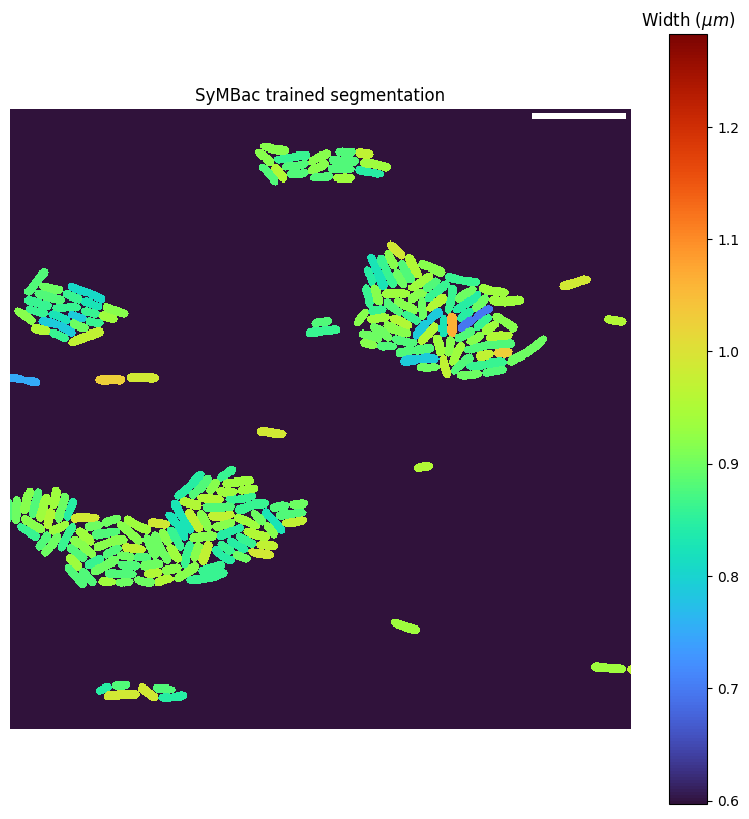

In [283]:
size_masks_symbac = get_width_mask_image(masks_symbac[0], np.array(symbac_mask_width_data.query("stack == 0")[["Width", "label"]]))
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(size_masks_symbac[300:900,300:900] * 0.11, vmin = 5.426 * 0.11, vmax = 11.66 * 0.11, cmap = "turbo", interpolation="none")
clb = plt.colorbar()
clb.ax.set_title('Width ($\mu m$)')
plt.axis("off")
scalebar = ScaleBar(0.11, "um", length_fraction=0.2,box_alpha=0, scale_loc="none", color="white", box_color="k") # 25 micon
ax.add_artist(scalebar)
plt.title("SyMBac trained segmentation")
plt.savefig("SI_SEG_COMPARISON_3.svg")

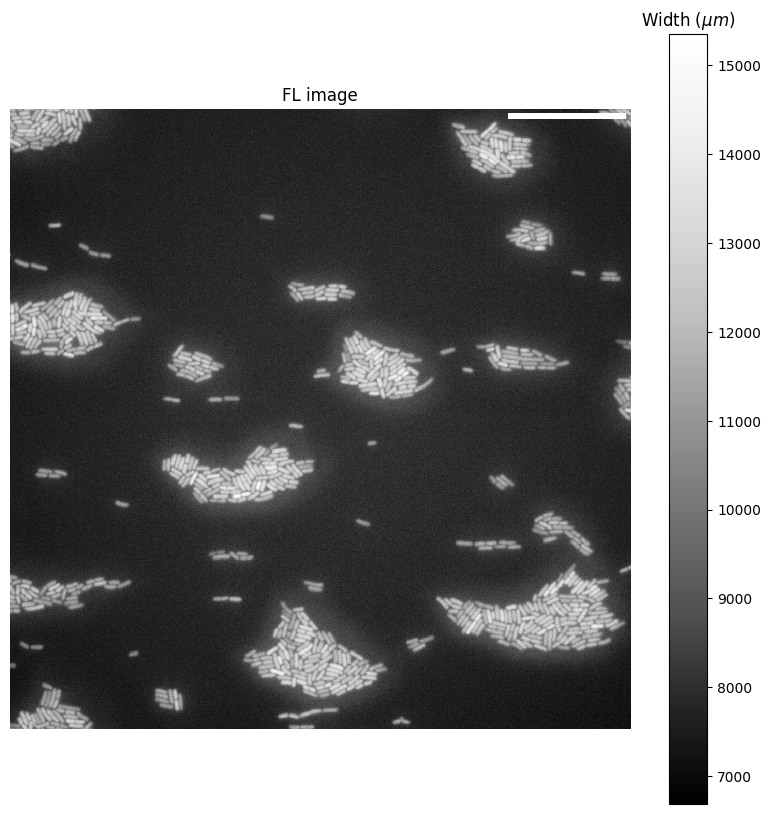

In [280]:
size_masks_omni = get_width_mask_image(masks_omnipose[0], np.array(ommnipose_mask_width_data.query("stack == 0")[["Width", "label"]]))
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(FL_image[0], cmap = "Greys_r", interpolation="none")
clb = plt.colorbar()
clb.ax.set_title('Width ($\mu m$)')
plt.axis("off")
plt.title("FL image")
scalebar = ScaleBar(0.11, "um", length_fraction=0.2,box_alpha=0, scale_loc="none", color="white", box_color="k") # 25 micon
ax.add_artist(scalebar)
plt.savefig("SI_SEG_COMPARISON_4.svg")

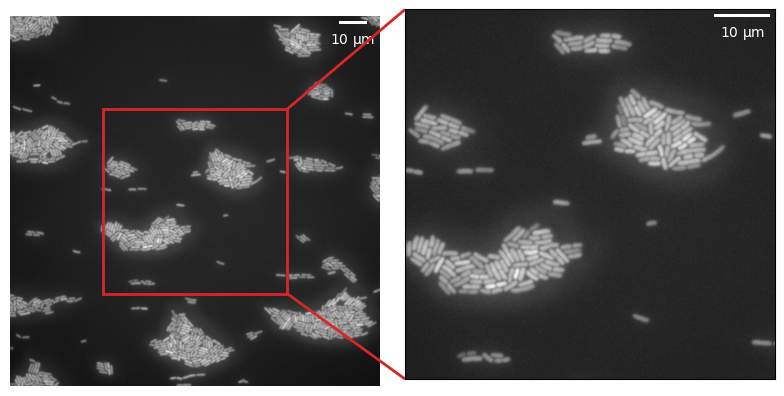

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Assuming size_masks_symbac is your numpy array
fig, ax = plt.subplots()

# Display the whole array
ax.imshow(FL_image[0], cmap='gray')  # Change the colormap as needed

# Create an inset with specific bounds and location outside the main image
axins = inset_axes(ax, width="100%", height="100%", loc='lower left', bbox_to_anchor=(1.05, 0, 1, 1), bbox_transform=ax.transAxes)

# Set the area of the array to be shown in the inset
axins.imshow(FL_image[0][::-1,::-1], cmap='gray')
# Set the limits for the inset to prevent additional axis decoration
axins.set_xlim(900, 300)
axins.set_ylim(300, 900)

# Remove the axis ticks
axins.set_xticks([])
axins.set_yticks([])
ax.set_axis_off()
# Mark the zoomed region on the main image and draw lines to the inset
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="tab:red", lw=2)
scalebar = ScaleBar(0.11, "um", length_fraction=0.1,box_alpha=0, color="white", box_color="k") # 25 micon
ax.add_artist(scalebar)
scalebar = ScaleBar(0.11, "um", length_fraction=0.2,box_alpha=0, color="white", box_color="k") # 25 micon
axins.add_artist(scalebar)
plt.show()


In [292]:
all_data_omni_symbac_df = pd.read_pickle("all_data_omni_symbac_df.pickle")
all_data_omni_symbac_df['Cell type'] = all_data_omni_symbac_df['Cell type'].replace({'Alone Cell': 'Isolated Cells', 'Colony Cell': 'Clustered Cells'})


,Width,Cell type,Model
0,0.916667,Isolated Cells,SyMBac trained
1,0.715000,Isolated Cells,SyMBac trained
2,0.916667,Isolated Cells,SyMBac trained
3,0.880000,Isolated Cells,SyMBac trained
4,0.953333,Isolated Cells,SyMBac trained


In [375]:
all_data_omni_symbac_df.groupby(["Cell type", "Model"]).count()

Width
Cell type       Model                
Clustered Cells Pretrained      11826
                SyMBac trained  12282
Isolated Cells  Pretrained         70
                SyMBac trained     95

In [ ]:
all_data_omni_symbac_df

In [299]:
all_data_omni_symbac_df.query("`Model` == 'SyMBac trained' & `Cell type` == 'Isolated Cells'")["Width"].mean()

0.9405964912280703

In [291]:
import seaborn as sns

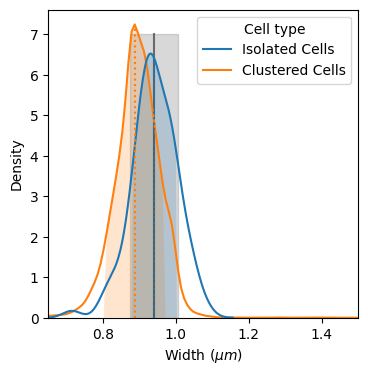

In [367]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))
ax.plot([0.94, 0.94], [0, 7], c = "k", alpha = 0.5)
ax.fill_between([0.94 - 0.066, 0.94 + 0.066], 0, 7, color='grey', alpha=0.3)

g = sns.kdeplot(data=all_data_omni_symbac_df.query("`Model` == 'SyMBac trained'"), x = "Width", hue = "Cell type", common_norm=False)

kdeline = ax.lines[1]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = all_data_omni_symbac_df.query("`Model` == 'SyMBac trained' & `Cell type` == 'Clustered Cells'")["Width"].mean()
sdev = all_data_omni_symbac_df.query("`Model` == 'SyMBac trained' & `Cell type` == 'Clustered Cells'")["Width"].std()
left = middle - sdev
right = middle + sdev
ax.vlines(middle, 0, np.interp(middle, xs, ys), color='tab:orange', ls=':')
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='tab:orange', alpha=0.2)

kdeline = ax.lines[2]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = all_data_omni_symbac_df.query("`Model` == 'SyMBac trained' & `Cell type` == 'Isolated Cells'")["Width"].mean()
sdev = all_data_omni_symbac_df.query("`Model` == 'SyMBac trained' & `Cell type` == 'Isolated Cells'")["Width"].std()
left = middle - sdev
right = middle + sdev
ax.vlines(middle, 0, np.interp(middle, xs, ys), color='tab:blue', ls=':')
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='tab:blue', alpha=0.2)

plt.xlim(0.65,1.5)
plt.xlabel("Width ($\mu m$)")
plt.savefig("SI_DIST_1.svg")

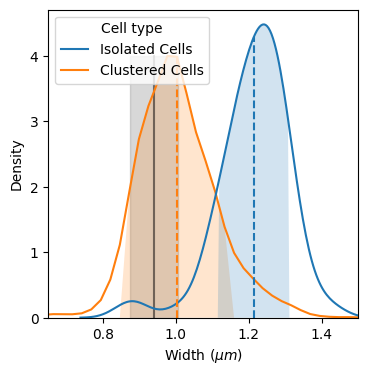

In [368]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))
ax.plot([0.94, 0.94], [0, 4], c = "k", alpha = 0.5)
ax.fill_between([0.94 - 0.066, 0.94 + 0.066], 0, 4, color='grey', alpha=0.3)

g = sns.kdeplot(data=all_data_omni_symbac_df.query("`Model` == 'Pretrained'"), x = "Width", hue = "Cell type", common_norm=False)

kdeline = ax.lines[1]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = all_data_omni_symbac_df.query("`Model` == 'Pretrained' & `Cell type` == 'Clustered Cells'")["Width"].mean()
sdev = all_data_omni_symbac_df.query("`Model` == 'Pretrained' & `Cell type` == 'Clustered Cells'")["Width"].std()
left = middle - sdev
right = middle + sdev
ax.vlines(middle, 0, np.interp(middle, xs, ys), color='tab:orange', ls='--')
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='tab:orange', alpha=0.2)


kdeline = ax.lines[2]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
middle = all_data_omni_symbac_df.query("`Model` == 'Pretrained' & `Cell type` == 'Isolated Cells'")["Width"].mean()
sdev = all_data_omni_symbac_df.query("`Model` == 'Pretrained' & `Cell type` == 'Isolated Cells'")["Width"].std()
left = middle - sdev
right = middle + sdev
ax.vlines(middle, 0, np.interp(middle, xs, ys), color='tab:blue', ls='--')
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='tab:blue', alpha=0.2)

plt.xlim(0.65,1.5)
plt.xlabel("Width ($\mu m$)")
plt.savefig("SI_DIST_2.svg")

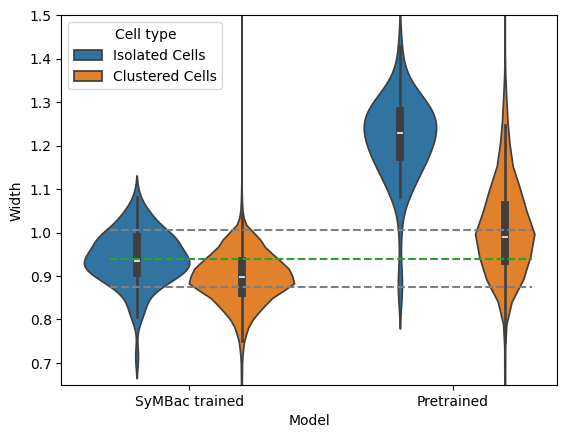

In [373]:
sns.violinplot(data= all_data_omni_symbac_df, x = "Model", y = "Width", hue = "Cell type")
plt.ylim(0.65,1.5)
plt.plot([-0.3,1.3],[0.94,0.94], c = "tab:green", linestyle = "--")
plt.plot([-0.3,1.3],[0.94+0.066,0.94+0.066], c = "tab:grey", linestyle = "--")
plt.plot([-0.3,1.3],[0.94-0.066,0.94-0.066], c = "tab:grey", linestyle = "--", label = "1 SD")